# Análisis descriptivo - Stock y precios

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pylab import rcParams
import seaborn as sb

import scipy
from scipy.stats.stats import pearsonr

In [88]:
#import CSV datasets

#dir(sp.read_csv)

# URLData1='https://raw.githubusercontent.com/carlosqu/TesisUniandes/master/Data/table4.txt'
# URLData2='https://raw.githubusercontent.com/carlosqu/TesisUniandes/master/Data/table5.txt'
# URLData3='https://raw.githubusercontent.com/carlosqu/TesisUniandes/master/Data/table6.txt'
# URLData4='https://raw.githubusercontent.com/carlosqu/TesisUniandes/master/Data/table11.txt'
# URLData5='https://raw.githubusercontent.com/carlosqu/TesisUniandes/master/Data/table12.txt'
# URLData6='https://raw.githubusercontent.com/carlosqu/TesisUniandes/master/Data/table13.txt'
# URLData7='https://raw.githubusercontent.com/carlosqu/TesisUniandes/master/Data/table14.txt'
# St_crude= pd.read_csv(URLData1)
# St_gas= pd.read_csv(URLData2)
# St_others= pd.read_csv(URLData3)
# Sp_crude= pd.read_csv(URLData4,nrows=12)
# Sp_fuel= pd.read_csv(URLData5)
# Fut_all= pd.read_csv(URLData6)
# Pri_gas= pd.read_csv(URLData7)
# print(St_crude) #se observa que tiene data actual,-1week,-1year,-2year
#print(St_gas) #se observa que tiene data actual,-1week,-1year,-2year
#print(St_others) #se observa que tiene data actual,-1week,-1year,-2year
#print(Sp_crude) #se observa que tiene data actual,mes,dia,semana, pero la importación se debe ajustar a sólo la mensual

In [2]:
#import EXCEL datasets

#dir(pd.read_csv)

URLData8='https://github.com/carlosqu/TesisUniandes/blob/master/Data/psw04.xls?raw=true'
URLData9='https://github.com/carlosqu/TesisUniandes/blob/master/Data/psw05.xls?raw=true'
URLData10='https://github.com/carlosqu/TesisUniandes/blob/master/Data/psw06.xls?raw=true'
URLData11='https://github.com/carlosqu/TesisUniandes/blob/master/Data/psw11.xls?raw=true'
URLData12='https://github.com/carlosqu/TesisUniandes/blob/master/Data/psw12.xls?raw=true'
URLData13='https://github.com/carlosqu/TesisUniandes/blob/master/Data/psw13.xls?raw=true'
URLData14='https://github.com/carlosqu/TesisUniandes/blob/master/Data/psw14.xls?raw=true'

#separate importation due to the amount of sheets

St_crude=pd.read_excel(URLData8,sheetname='Data 1',skiprows=2)
St_gas=pd.read_excel(URLData9,sheetname='Data 1',skiprows=2)
St_others=pd.read_excel(URLData10,sheetname='Data 1',skiprows=2)

Sp_crude1=pd.read_excel(URLData11,sheetname='Data 1',skiprows=2)
Sp_crude2=pd.read_excel(URLData11,sheetname='Data 2',skiprows=2)
Sp_crude3=pd.read_excel(URLData11,sheetname='Data 3',skiprows=2)
Sp_crude4=pd.read_excel(URLData11,sheetname='Data 4',skiprows=2)

Sp_fuel1=pd.read_excel(URLData12,sheetname='Data 1',skiprows=2)
Sp_fuel2=pd.read_excel(URLData12,sheetname='Data 2',skiprows=2)
Sp_fuel3=pd.read_excel(URLData12,sheetname='Data 3',skiprows=2)

Fut_all1=pd.read_excel(URLData13,sheetname='Data 1',skiprows=2)
Fut_all2=pd.read_excel(URLData13,sheetname='Data 2',skiprows=2)
Fut_all3=pd.read_excel(URLData13,sheetname='Data 3',skiprows=2)

Pri_gas1=pd.read_excel(URLData14,sheetname='Data 1',skiprows=2)
Pri_gas2=pd.read_excel(URLData14,sheetname='Data 2',skiprows=2)

In [1]:
#recognize the variables for each dataset...try to merge the different sheets of the same Excel file

# St_crude.columns
# St_gas.columns
# St_others.columns

# Sp_crude1.columns
# Sp_crude2.columns
# Sp_crude3.columns
# Sp_crude4.columns

# Sp_fuel1.columns
# Sp_fuel2.columns
# Sp_fuel3.columns

# Fut_all1.columns
# Fut_all2.columns
# Fut_all3.columns

# Pri_gas1.columns
# Pri_gas2.columns

In [3]:
#Merging dataframes

a=pd.merge(Sp_crude1,Sp_crude2,on='Date',how='outer')
b=pd.merge(a,Sp_crude3,on='Date',how='outer')
Sp_crude=pd.merge(b,Sp_crude4,on='Date',how='outer')

c=pd.merge(Sp_fuel2,Sp_fuel1,on='Date',how='outer')
Sp_fuel=pd.merge(c,Sp_fuel3,on='Date',how='outer')

d=pd.merge(Fut_all3,Fut_all1,on='Date',how='outer')
Fut_all=pd.merge(d,Fut_all2,on='Date',how='outer')

Pri_gas=Pri_gas1

In [231]:
#brief of descriptives

# St_crude.describe() #WEEKLY
# St_gas.describe() #WEEKLY
# St_others.describe() #WEEKLY
# Sp_crude.describe() #DAILY
# Sp_fuel.describe() #DAILY
# Fut_all.describe() #DAILY
# Pri_gas.describe() #WEEKLY

# St_crude.columns 
#'Weekly Gulf Coast (PADD 3) Ending Stocks excluding SPR of Crude Oil  (Thousand Barrels)'

#St_gas.columns
#'Weekly Gulf Coast (PADD 3) Ending Stocks of Conventional Motor Gasoline  (Thousand Barrels)'
# 'Weekly Gulf Coast (PADD 3) Ending Stocks of Finished Motor Gasoline  (Thousand Barrels)'
# 'Weekly Gulf Coast (PADD 3) Ending Stocks of Fuel Ethanol  (Thousand Barrels)'
# 'Weekly Gulf Coast (PADD 3) Ending Stocks of Gasoline Blending Components  (Thousand Barrels)'
# 'Weekly Gulf Coast (PADD 3) Ending Stocks of Reformulated Motor Gasoline  (Thousand Barrels)'
# 'Weekly Gulf Coast (PADD 3) Ending Stocks of Total Gasoline  (Thousand Barrels)'

# St_others.columns
# 'Weekly Gulf Coast (PADD 3) Ending Stocks of Distillate Fuel Oil  (Thousand Barrels)'
# 'Weekly Gulf Coast (PADD 3) Ending Stocks of Distillate Fuel Oil, 0 to 15 ppm Sulfur  (Thousand Barrels)'
# 'Weekly Gulf Coast (PADD 3) Ending Stocks of Distillate Fuel Oil, Greater than 15 to 500 ppm Sulfur  (Thousand Barrels)'
# 'Weekly Gulf Coast (PADD 3) Ending Stocks of Distillate Fuel Oil, Greater Than 500 ppm Sulfur  (Thousand Barrels)'
# 'Weekly Gulf Coast (PADD 3) Ending Stocks of Kerosene-Type Jet Fuel  (Thousand Barrels)'
# 'Weekly Gulf Coast (PADD 3) Ending Stocks of Propane and Propylene  (Thousand Barrels)'
# 'Weekly Gulf Coast (PADD 3) Ending Stocks of Residual Fuel Oil  (Thousand Barrels)'

# Sp_crude.columns
#all of them

# Sp_fuel.columns
#all of them

# Fut_all.columns
#all of them

# Pri_gas.columns
#all of them

In [4]:
#then we decide to merge the set as the following: 1_STOCKS-SPOT PRICES, 2_STOCKS-FUTURE PRICES, 3_STOCKS-GAS PRICES

spots=pd.merge(Sp_crude,Sp_fuel,on='Date',how='outer')

e=pd.merge(St_crude[[
        'Date',
        'Weekly Gulf Coast (PADD 3) Ending Stocks excluding SPR of Crude Oil  (Thousand Barrels)'
    ]],
    St_gas[[
        'Date',
        'Weekly Gulf Coast (PADD 3) Ending Stocks of Conventional Motor Gasoline  (Thousand Barrels)',
        'Weekly Gulf Coast (PADD 3) Ending Stocks of Finished Motor Gasoline  (Thousand Barrels)',
        'Weekly Gulf Coast (PADD 3) Ending Stocks of Fuel Ethanol  (Thousand Barrels)',
        'Weekly Gulf Coast (PADD 3) Ending Stocks of Gasoline Blending Components  (Thousand Barrels)',
        'Weekly Gulf Coast (PADD 3) Ending Stocks of Reformulated Motor Gasoline  (Thousand Barrels)',
        'Weekly Gulf Coast (PADD 3) Ending Stocks of Total Gasoline  (Thousand Barrels)'
    ]],
    on='Date',how='outer')

stocks=pd.merge(e,
    St_others[[
        'Date',
        'Weekly Gulf Coast (PADD 3) Ending Stocks of Distillate Fuel Oil  (Thousand Barrels)',
        'Weekly Gulf Coast (PADD 3) Ending Stocks of Distillate Fuel Oil, 0 to 15 ppm Sulfur  (Thousand Barrels)',
        'Weekly Gulf Coast (PADD 3) Ending Stocks of Distillate Fuel Oil, Greater than 15 to 500 ppm Sulfur  (Thousand Barrels)',
        'Weekly Gulf Coast (PADD 3) Ending Stocks of Distillate Fuel Oil, Greater Than 500 ppm Sulfur  (Thousand Barrels)',
        'Weekly Gulf Coast (PADD 3) Ending Stocks of Kerosene-Type Jet Fuel  (Thousand Barrels)',
        'Weekly Gulf Coast (PADD 3) Ending Stocks of Propane and Propylene  (Thousand Barrels)',
        'Weekly Gulf Coast (PADD 3) Ending Stocks of Residual Fuel Oil  (Thousand Barrels)'
    ]],
    on='Date',how='outer')

#and we get ready the 3 final datasets

#1
ss=pd.merge(stocks,spots,on='Date',how='outer')

#2
sf=pd.merge(stocks,Fut_all,on='Date',how='outer')

#3
sg=pd.merge(stocks,Pri_gas,on='Date',how='outer')

In [94]:
#Finally, we have the datasets ready to evaluate Correlation
# ss
# sf
# sg

#export_excel = sg.to_excel (r'C:\Users\carlos_q\Desktop\export_dataframe2.xlsx', index = None, header=True)


#look for NANs 
# ss.describe()
# ss.shape
# ss.isnull().sum()
# ss.notnull().sum()
# ss.count()

# sf.describe()
# sf.shape
# sf.isnull().sum()
# sf.notnull().sum()
# sf.count()

# sg.describe()
# sg.shape
# sg.isnull().sum()
# sg.notnull().sum()
# sg.count()

#after that, we look for complete rows (with no NANs) to see if we get enough data to estimate

# ss1=ss
# ss1['full_count'] = ss1.apply(lambda x: x.count(), axis=1)

# sf1=sf
# sf1['full_count'] = sf1.apply(lambda x: x.count(), axis=1)

# sg1=sg
# sg1['full_count'] = sg1.apply(lambda x: x.count(), axis=1)

# pd.pivot_table(ss1, index='full_count', aggfunc='count')
# pd.pivot_table(sf1, index='full_count', aggfunc='count')
# pd.pivot_table(sg1, index='full_count', aggfunc='count')

# ss tiene 26/26
# sf tiene 28/28
# sg tiene 26/40

#WE GOT A PROBLEM ON 'sg'

In [5]:
#as we check 'sg' dataset, almost none week-key match due to days difference, so we'll normalize the Date into a monthly average

#first we create the monthly variable

sg2=sg

sg2['Date2'] = sg2['Date'].dt.year
sg2['Date3'] = sg2['Date'].dt.month

sg2['NewDate']=pd.to_datetime(sg2.Date2*10000+sg2.Date3*100+1,format='%Y%m%d')
sg3=pd.pivot_table(sg2, index='NewDate', aggfunc=np.mean)
sg3.describe()

,Date2,Date3,Weekly California No 2 Diesel Retail Prices (Dollars per Gallon),Weekly Central Atlantic (PADD 1B) No 2 Diesel Retail Prices (Dollars per Gallon),Weekly Central Atlantic (PADD 1B) Regular All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly East Coast No 2 Diesel Retail Prices (Dollars per Gallon),Weekly East Coast Regular All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly Gulf Coast (PADD 3) Ending Stocks excluding SPR of Crude Oil (Thousand Barrels),Weekly Gulf Coast (PADD 3) Ending Stocks of Conventional Motor Gasoline (Thousand Barrels),Weekly Gulf Coast (PADD 3) Ending Stocks of Distillate Fuel Oil (Thousand Barrels),...,Weekly Rocky Mountain Regular All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly U.S. All Grades Conventional Retail Gasoline Prices (Dollars per Gallon),Weekly U.S. All Grades Reformulated Retail Gasoline Prices (Dollars per Gallon),Weekly U.S. Midgrade All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly U.S. No 2 Diesel Retail Prices (Dollars per Gallon),Weekly U.S. Premium All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly U.S. Regular All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly West Coast No 2 Diesel Retail Prices (Dollars per Gallon),Weekly West Coast Regular All Formulations Retail Gasoline Prices (Dollars per Gallon)
count,444.000000,444.000000,289.000000,267.000000,316.000000,305.00000,327.000000,355.000000,307.000000,355.000000,...,327.000000,316.000000,297.000000,297.000000,297.000000,305.000000,297.000000,348.000000,305.000000,327.000000
mean,2000.583333,6.500000,2.661126,2.638417,2.179268,2.36306,2.089231,163474.058028,27370.885342,33892.265352,...,2.109743,2.198928,2.224580,2.374950,2.354381,2.345347,2.484229,2.050036,2.509853,2.350873
std,10.700511,3.455947,1.072036,1.018046,0.895074,1.04702,0.896047,32916.562991,11666.292547,7572.175760,...,0.861629,0.903284,0.867876,0.907079,0.904219,1.032334,0.931209,0.898820,1.071147,0.979053
min,1982.000000,1.000000,1.104250,1.050000,0.945500,0.96550,0.903000,120734.200000,7226.750000,22650.000000,...,0.956750,0.962000,0.940000,1.047000,1.020250,0.959000,1.111500,0.920500,1.038000,1.072500
25%,1991.000000,3.750000,1.556750,1.587125,1.291263,1.31460,1.202150,141819.375000,14026.700000,28247.475000,...,1.261125,1.284375,1.401800,1.514000,1.491600,1.309000,1.582400,1.179600,1.413200,1.365625
50%,2001.000000,6.500000,2.767800,2.685250,2.198050,2.45080,2.041750,154730.600000,33545.250000,30980.600000,...,1.993750,2.222250,2.258000,2.401600,2.384750,2.438500,2.522000,1.917000,2.620750,2.344600
75%,2010.000000,9.250000,3.607750,3.380750,2.814450,3.08320,2.751625,168724.000000,35715.375000,39181.500000,...,2.823150,2.886200,2.846800,3.082800,3.056250,3.074600,3.180800,2.760650,3.400000,3.135425
max,2019.000000,12.000000,4.967600,4.862600,4.076000,4.76200,4.038500,278024.800000,48851.500000,54230.500000,...,4.081750,4.114250,4.050750,4.243250,4.181250,4.703000,4.298250,4.061500,4.851500,4.371800


In [ ]:
#Now we are ready to work with the datasets
# ss
# sf
# sg3

# Correlación - Stock y Precios Spot

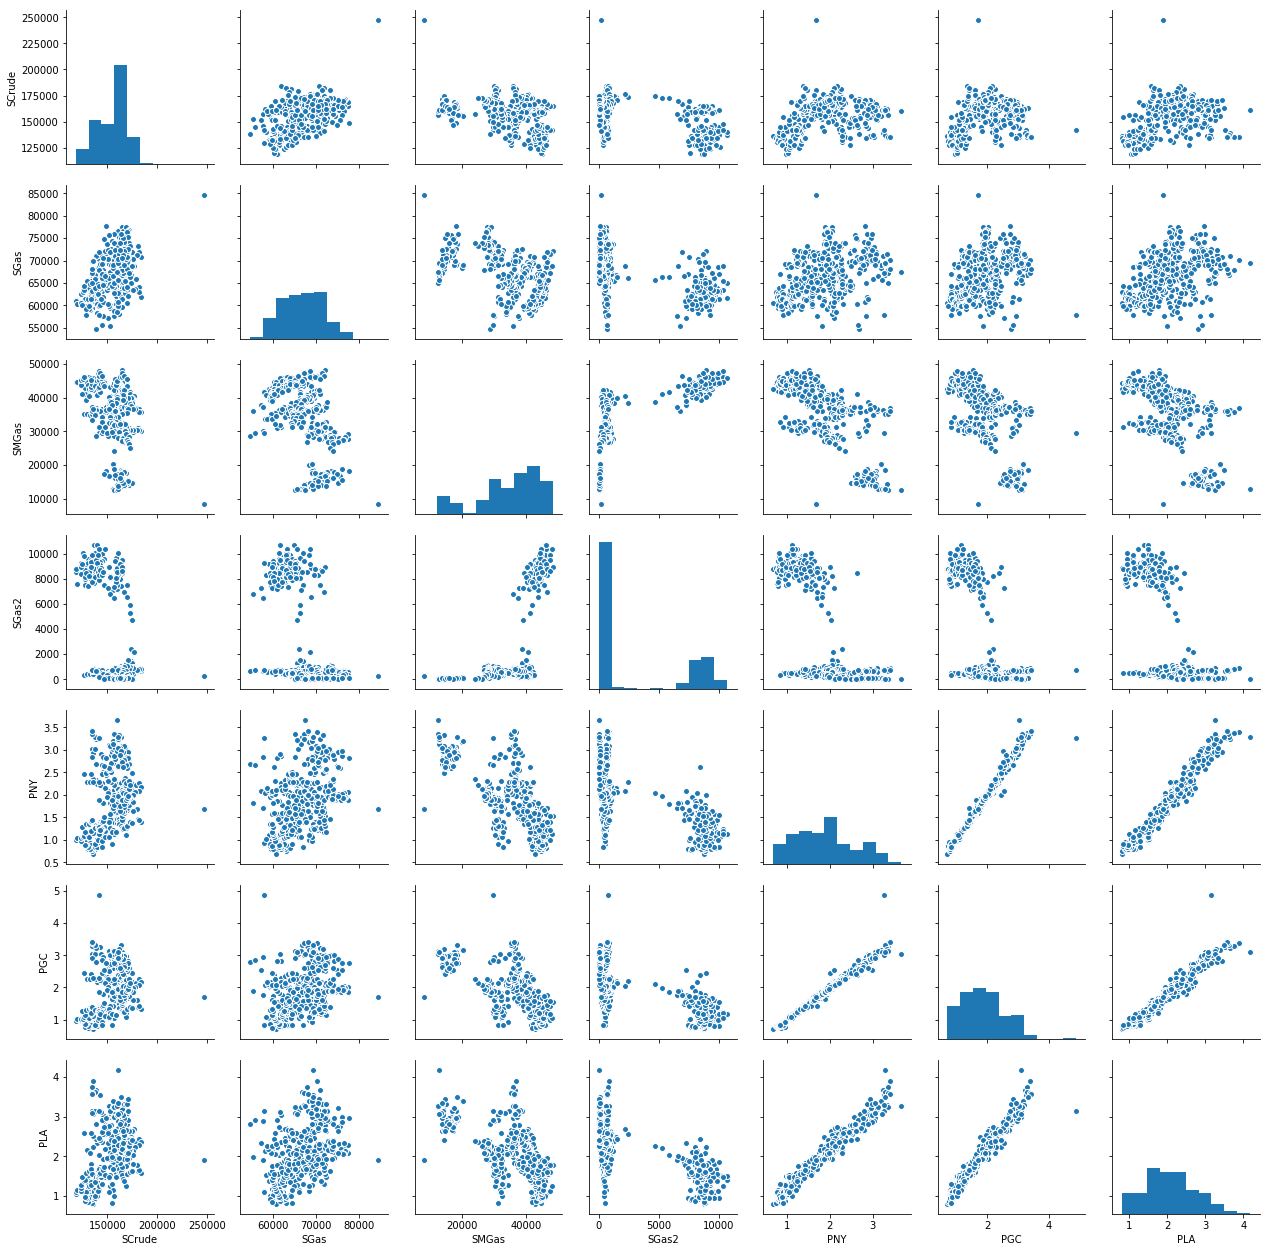

In [6]:
# To the beginning lets review the following assumptions before run the evaluation: 
# normal distribution of variables
# continiuous numeric variables
# variables linearly related

#lets filter the ss dataset
#'Weekly Gulf Coast (PADD 3) Ending Stocks excluding SPR of Crude Oil  (Thousand Barrels)'
#'Weekly Gulf Coast (PADD 3) Ending Stocks of Total Gasoline  (Thousand Barrels)'
#'Weekly Gulf Coast (PADD 3) Ending Stocks of Finished Motor Gasoline  (Thousand Barrels)'
#'Weekly Gulf Coast (PADD 3) Ending Stocks of Reformulated Motor Gasoline  (Thousand Barrels)'
#'New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)'
#'U.S. Gulf Coast Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)'
#'Los Angeles Reformulated RBOB Regular Gasoline Spot Price (Dollars per Gallon)'

X=ss[[
        'Weekly Gulf Coast (PADD 3) Ending Stocks excluding SPR of Crude Oil  (Thousand Barrels)',
        'Weekly Gulf Coast (PADD 3) Ending Stocks of Total Gasoline  (Thousand Barrels)',
        'Weekly Gulf Coast (PADD 3) Ending Stocks of Finished Motor Gasoline  (Thousand Barrels)',
        'Weekly Gulf Coast (PADD 3) Ending Stocks of Reformulated Motor Gasoline  (Thousand Barrels)',
        'New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)',
        'U.S. Gulf Coast Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)',
        'Los Angeles Reformulated RBOB Regular Gasoline Spot Price (Dollars per Gallon)'        
    ]]

X=X.rename(columns={
                            "Weekly Gulf Coast (PADD 3) Ending Stocks excluding SPR of Crude Oil  (Thousand Barrels)":"SCrude",
                            "Weekly Gulf Coast (PADD 3) Ending Stocks of Total Gasoline  (Thousand Barrels)":"SGas",
                            "Weekly Gulf Coast (PADD 3) Ending Stocks of Finished Motor Gasoline  (Thousand Barrels)":"SMGas",
                            "Weekly Gulf Coast (PADD 3) Ending Stocks of Reformulated Motor Gasoline  (Thousand Barrels)":"SGas2",
                            "New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)":"PNY",
                            "U.S. Gulf Coast Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)":"PGC",
                            "Los Angeles Reformulated RBOB Regular Gasoline Spot Price (Dollars per Gallon)":"PLA"})

X = X.replace({0:np.nan})
X.dropna(inplace=True)

sb.pairplot(X,dropna=True)
plt.show()

### Correlation Matrix: precios spot / stock

In [10]:
#finally...
corr=X.corr()
X.corr()

,SCrude,SGas,SMGas,SGas2,PNY,PGC,PLA
SCrude,1.000000,0.533345,-0.461969,-0.552425,0.356955,0.344642,0.369767
SGas,0.533345,1.000000,-0.571426,-0.572867,0.410456,0.377172,0.411406
SMGas,-0.461969,-0.571426,1.000000,0.711894,-0.702918,-0.664213,-0.646674
SGas2,-0.552425,-0.572867,0.711894,1.000000,-0.670459,-0.648340,-0.656071
PNY,0.356955,0.410456,-0.702918,-0.670459,1.000000,0.987318,0.976916
PGC,0.344642,0.377172,-0.664213,-0.648340,0.987318,1.000000,0.969611
PLA,0.369767,0.411406,-0.646674,-0.656071,0.976916,0.969611,1.000000


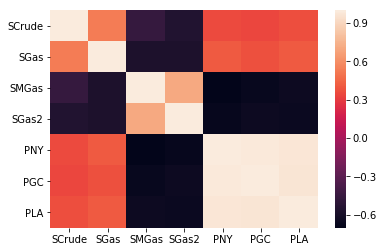

In [11]:
#graphically
sb.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)
plt.show()

# Correlación - Stock y Precios Futuros

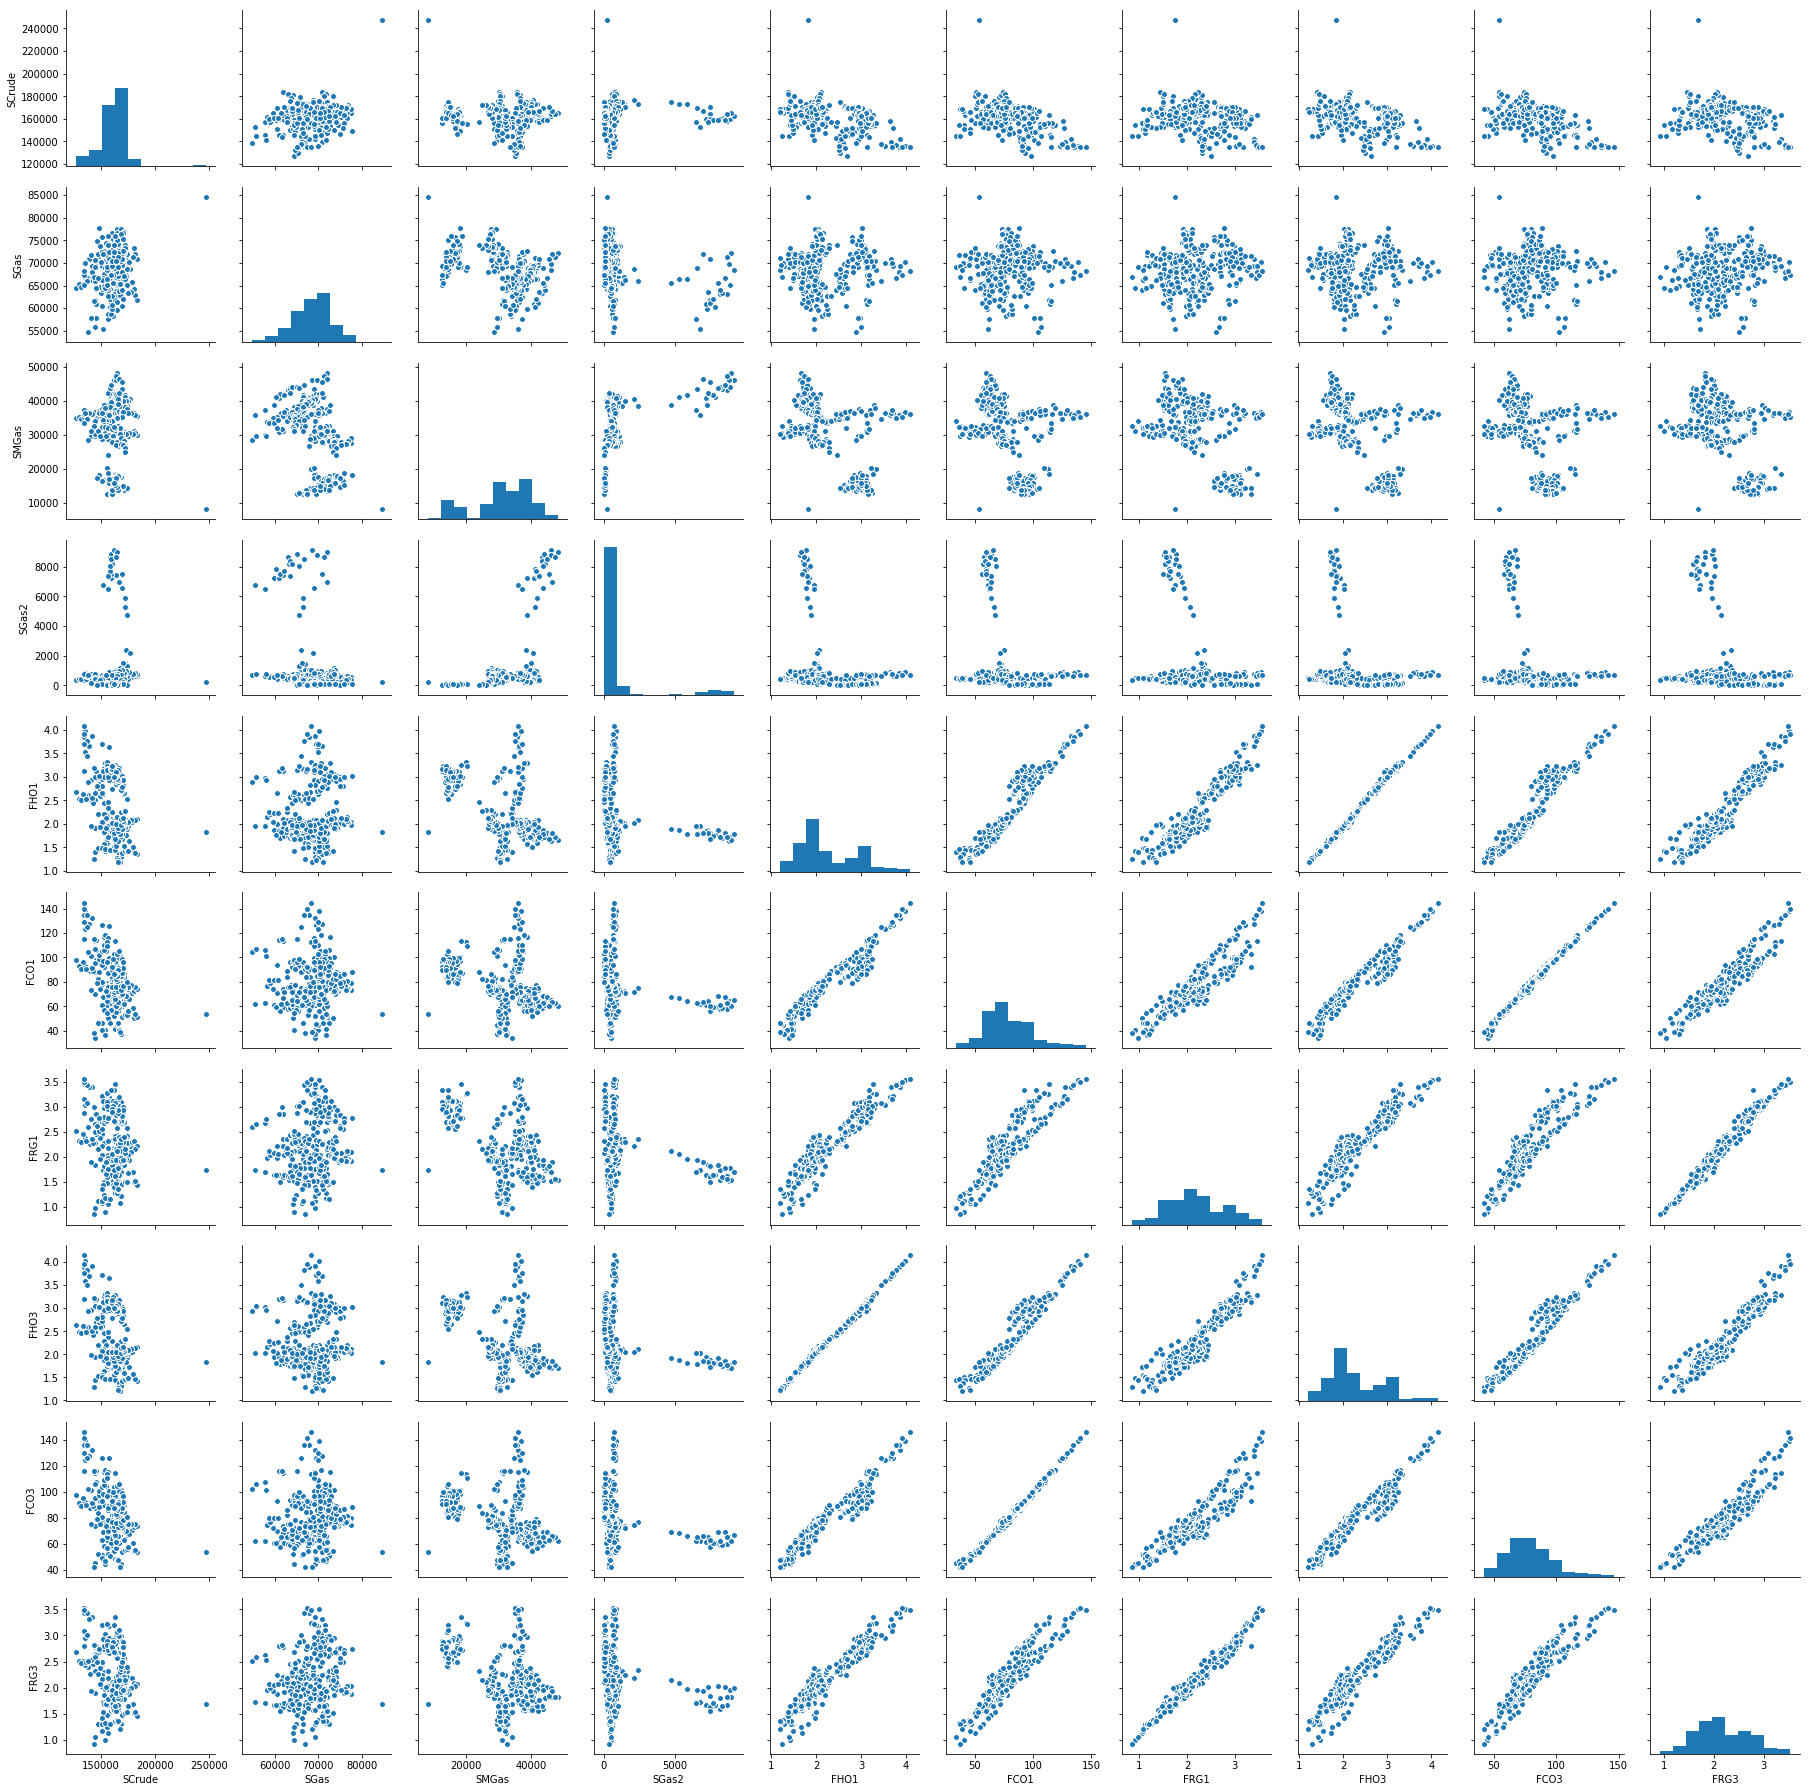

In [12]:
# To the beginning lets review the following assumptions before run the evaluation: 
# normal distribution of variables
# continiuous numeric variables
# variables linearly related

#lets filter the sf dataset
#'Weekly Gulf Coast (PADD 3) Ending Stocks excluding SPR of Crude Oil  (Thousand Barrels)'
#'Weekly Gulf Coast (PADD 3) Ending Stocks of Total Gasoline  (Thousand Barrels)'
#'Weekly Gulf Coast (PADD 3) Ending Stocks of Finished Motor Gasoline  (Thousand Barrels)'
#'Weekly Gulf Coast (PADD 3) Ending Stocks of Reformulated Motor Gasoline  (Thousand Barrels)'
#'New York Harbor No. 2 Heating Oil Future Contract 1 (Dollars per Gallon)'
#'Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)'
#'New York Harbor Reformulated RBOB Regular Gasoline Future Contract 1 (Dollars per Gallon)'
#'New York Harbor No. 2 Heating Oil Future Contract 3 (Dollars per Gallon)'
#'Cushing, OK Crude Oil Future Contract 3 (Dollars per Barrel)'
#'New York Harbor Reformulated RBOB Regular Gasoline Future Contract 3 (Dollars per Gallon)'

Y=sf[[
        'Weekly Gulf Coast (PADD 3) Ending Stocks excluding SPR of Crude Oil  (Thousand Barrels)',
        'Weekly Gulf Coast (PADD 3) Ending Stocks of Total Gasoline  (Thousand Barrels)',
        'Weekly Gulf Coast (PADD 3) Ending Stocks of Finished Motor Gasoline  (Thousand Barrels)',
        'Weekly Gulf Coast (PADD 3) Ending Stocks of Reformulated Motor Gasoline  (Thousand Barrels)',
        'New York Harbor No. 2 Heating Oil Future Contract 1 (Dollars per Gallon)',
        'Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)',
        'New York Harbor Reformulated RBOB Regular Gasoline Future Contract 1 (Dollars per Gallon)',
        'New York Harbor No. 2 Heating Oil Future Contract 3 (Dollars per Gallon)',
        'Cushing, OK Crude Oil Future Contract 3 (Dollars per Barrel)',
        'New York Harbor Reformulated RBOB Regular Gasoline Future Contract 3 (Dollars per Gallon)'  
    ]]

Y=Y.rename(columns={
                    'Weekly Gulf Coast (PADD 3) Ending Stocks excluding SPR of Crude Oil  (Thousand Barrels)':"SCrude",
                    'Weekly Gulf Coast (PADD 3) Ending Stocks of Total Gasoline  (Thousand Barrels)':"SGas",
                    'Weekly Gulf Coast (PADD 3) Ending Stocks of Finished Motor Gasoline  (Thousand Barrels)':"SMGas",
                    'Weekly Gulf Coast (PADD 3) Ending Stocks of Reformulated Motor Gasoline  (Thousand Barrels)':"SGas2",
                    'New York Harbor No. 2 Heating Oil Future Contract 1 (Dollars per Gallon)':"FHO1",
                    'Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)':"FCO1",
                    'New York Harbor Reformulated RBOB Regular Gasoline Future Contract 1 (Dollars per Gallon)':"FRG1",
                    'New York Harbor No. 2 Heating Oil Future Contract 3 (Dollars per Gallon)':"FHO3",
                    'Cushing, OK Crude Oil Future Contract 3 (Dollars per Barrel)':"FCO3",
                    'New York Harbor Reformulated RBOB Regular Gasoline Future Contract 3 (Dollars per Gallon)':"FRG3"})

Y = Y.replace({0:np.nan})
Y.dropna(inplace=True)

sb.pairplot(Y,dropna=True)
plt.show()

### Correlation Matrix: precios futuros / stock

In [15]:
#finally...
corr2=Y.corr()
Y.corr()

,SCrude,SGas,SMGas,SGas2,FHO1,FCO1,FRG1,FHO3,FCO3,FRG3
SCrude,1.000000,0.270554,-0.160026,0.035479,-0.406437,-0.447654,-0.227141,-0.403997,-0.453564,-0.298149
SGas,0.270554,1.000000,-0.424907,-0.268989,0.077233,0.048594,0.115425,0.069315,0.071014,0.122191
SMGas,-0.160026,-0.424907,1.000000,0.484039,-0.478790,-0.318085,-0.494842,-0.472017,-0.327439,-0.435084
SGas2,0.035479,-0.268989,0.484039,1.000000,-0.264868,-0.250583,-0.276302,-0.260030,-0.261190,-0.232968
FHO1,-0.406437,0.077233,-0.478790,-0.264868,1.000000,0.947856,0.935728,0.998081,0.949750,0.946547
FCO1,-0.447654,0.048594,-0.318085,-0.250583,0.947856,1.000000,0.905562,0.950567,0.997175,0.931829
FRG1,-0.227141,0.115425,-0.494842,-0.276302,0.935728,0.905562,1.000000,0.935947,0.907015,0.984875
FHO3,-0.403997,0.069315,-0.472017,-0.260030,0.998081,0.950567,0.935947,1.000000,0.953364,0.944473
FCO3,-0.453564,0.071014,-0.327439,-0.261190,0.949750,0.997175,0.907015,0.953364,1.000000,0.933502
FRG3,-0.298149,0.122191,-0.435084,-0.232968,0.946547,0.931829,0.984875,0.944473,0.933502,1.000000


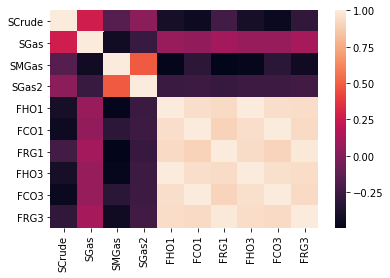

In [22]:
#graphically
sb.heatmap(Y.corr(),xticklabels=Y.corr().columns.values,yticklabels=Y.corr().columns.values)
plt.show()

# Correlación - Stock y Precios Gas

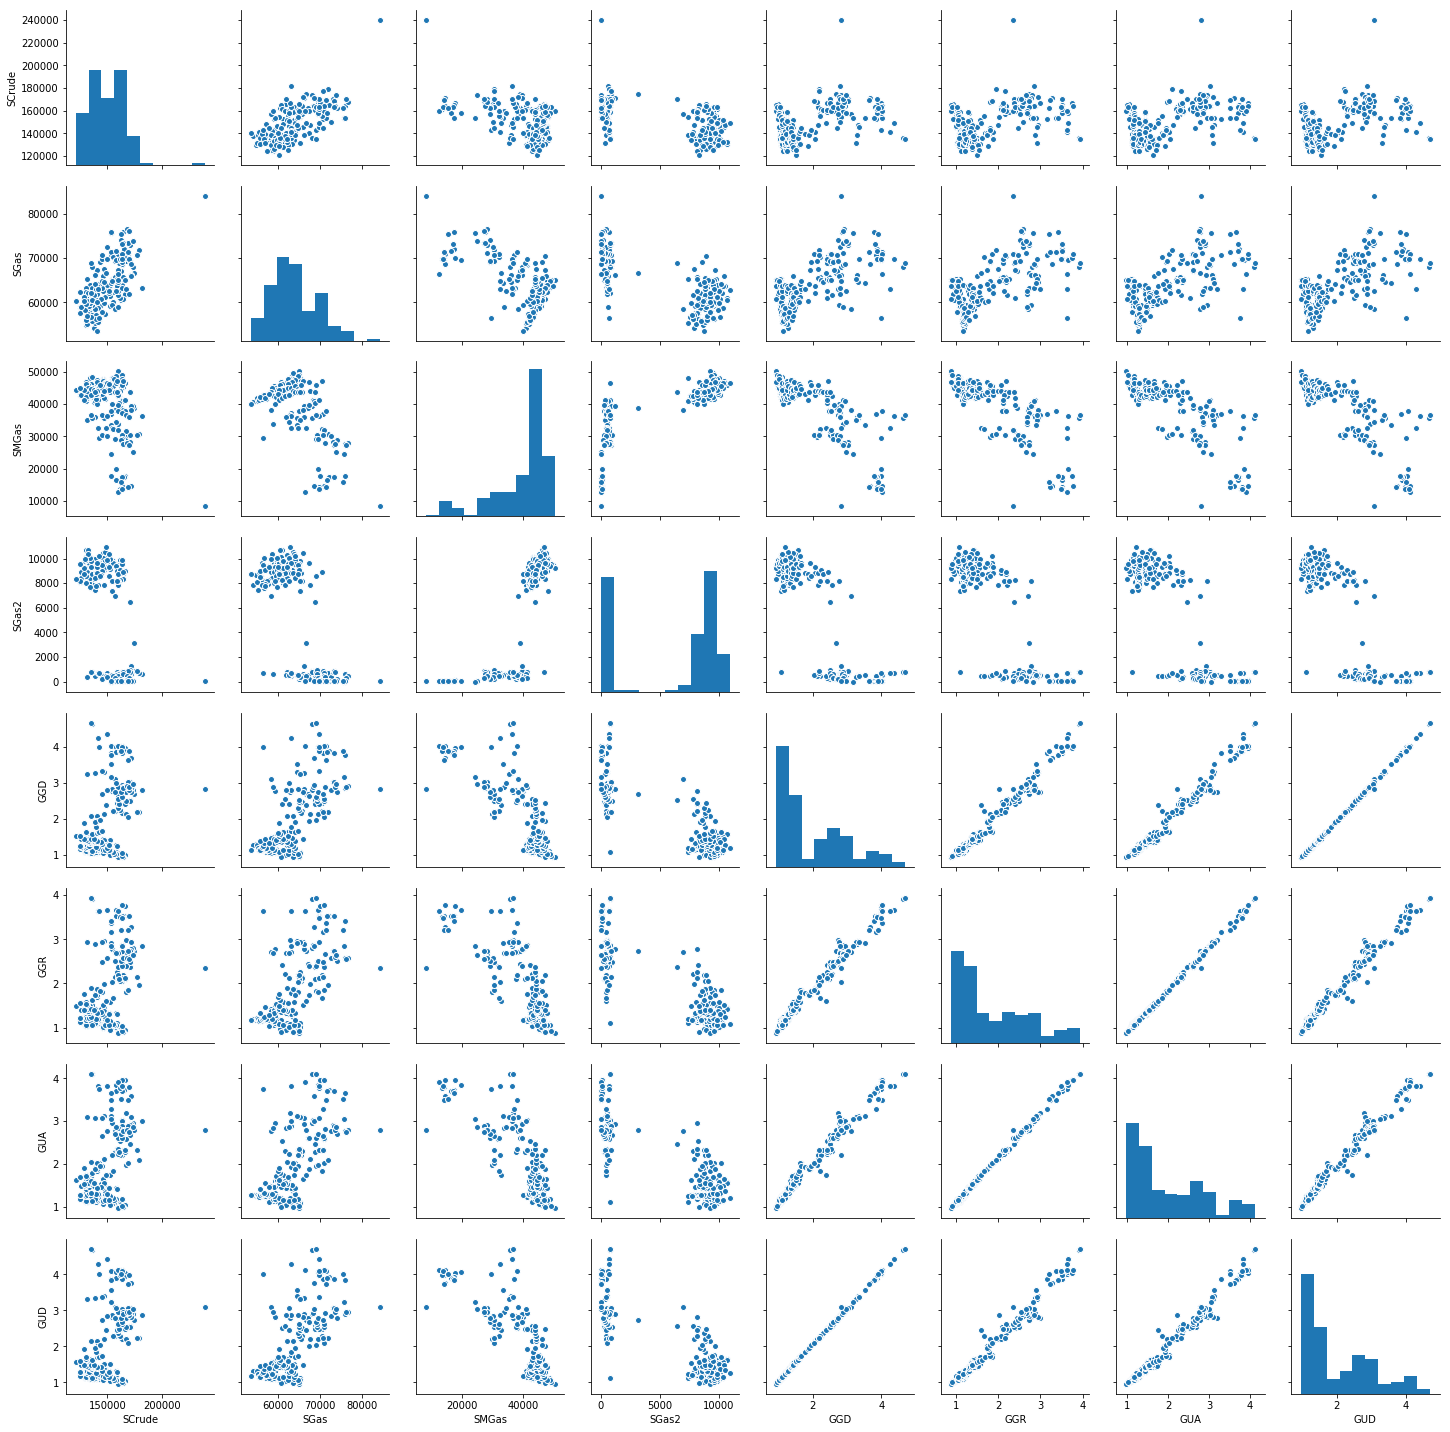

In [17]:
# To the beginning lets review the following assumptions before run the evaluation: 
# normal distribution of variables
# continiuous numeric variables
# variables linearly related

#lets filter the sg3 dataset
#'Weekly Gulf Coast (PADD 3) Ending Stocks excluding SPR of Crude Oil  (Thousand Barrels)'
#'Weekly Gulf Coast (PADD 3) Ending Stocks of Total Gasoline  (Thousand Barrels)'
#'Weekly Gulf Coast (PADD 3) Ending Stocks of Finished Motor Gasoline  (Thousand Barrels)'
#'Weekly Gulf Coast (PADD 3) Ending Stocks of Reformulated Motor Gasoline  (Thousand Barrels)'
# 'Weekly Gulf Coast No 2 Diesel Retail Prices  (Dollars per Gallon)'
# 'Weekly Gulf Coast Regular All Formulations Retail Gasoline Prices  (Dollars per Gallon)'
# 'Weekly U.S. All Grades All Formulations Retail Gasoline Prices  (Dollars per Gallon)'
# 'Weekly U.S. No 2 Diesel Retail Prices  (Dollars per Gallon)'


Z=sg3[[
        'Weekly Gulf Coast (PADD 3) Ending Stocks excluding SPR of Crude Oil  (Thousand Barrels)',
        'Weekly Gulf Coast (PADD 3) Ending Stocks of Total Gasoline  (Thousand Barrels)',
        'Weekly Gulf Coast (PADD 3) Ending Stocks of Finished Motor Gasoline  (Thousand Barrels)',
        'Weekly Gulf Coast (PADD 3) Ending Stocks of Reformulated Motor Gasoline  (Thousand Barrels)',
        'Weekly Gulf Coast No 2 Diesel Retail Prices  (Dollars per Gallon)',
        'Weekly Gulf Coast Regular All Formulations Retail Gasoline Prices  (Dollars per Gallon)',
        'Weekly U.S. All Grades All Formulations Retail Gasoline Prices  (Dollars per Gallon)',
        'Weekly U.S. No 2 Diesel Retail Prices  (Dollars per Gallon)' 
    ]]

Z=Z.rename(columns={
                    'Weekly Gulf Coast (PADD 3) Ending Stocks excluding SPR of Crude Oil  (Thousand Barrels)':"SCrude",
                    'Weekly Gulf Coast (PADD 3) Ending Stocks of Total Gasoline  (Thousand Barrels)':"SGas",
                    'Weekly Gulf Coast (PADD 3) Ending Stocks of Finished Motor Gasoline  (Thousand Barrels)':"SMGas",
                    'Weekly Gulf Coast (PADD 3) Ending Stocks of Reformulated Motor Gasoline  (Thousand Barrels)':"SGas2",
                    'Weekly Gulf Coast No 2 Diesel Retail Prices  (Dollars per Gallon)':"GGD",
                    'Weekly Gulf Coast Regular All Formulations Retail Gasoline Prices  (Dollars per Gallon)':"GGR",
                    'Weekly U.S. All Grades All Formulations Retail Gasoline Prices  (Dollars per Gallon)':"GUA",
                    'Weekly U.S. No 2 Diesel Retail Prices  (Dollars per Gallon)':"GUD"})

Z = Z.replace({0:np.nan})
Z.dropna(inplace=True)

sb.pairplot(Z,dropna=True)
plt.show()

In [27]:
Z.shape

(209, 8)

### Correlation Matrix: precios futuros / stock

In [18]:
#finally...
corr3=Z.corr()
Z.corr()

,SCrude,SGas,SMGas,SGas2,GGD,GGR,GUA,GUD
SCrude,1.000000,0.688669,-0.517725,-0.589765,0.464026,0.467521,0.481212,0.467772
SGas,0.688669,1.000000,-0.651068,-0.708471,0.675926,0.654372,0.669930,0.678714
SMGas,-0.517725,-0.651068,1.000000,0.809063,-0.795020,-0.785180,-0.798819,-0.799579
SGas2,-0.589765,-0.708471,0.809063,1.000000,-0.850751,-0.835235,-0.839523,-0.851484
GGD,0.464026,0.675926,-0.795020,-0.850751,1.000000,0.987986,0.988009,0.999735
GGR,0.467521,0.654372,-0.785180,-0.835235,0.987986,1.000000,0.998772,0.987977
GUA,0.481212,0.669930,-0.798819,-0.839523,0.988009,0.998772,1.000000,0.988681
GUD,0.467772,0.678714,-0.799579,-0.851484,0.999735,0.987977,0.988681,1.000000


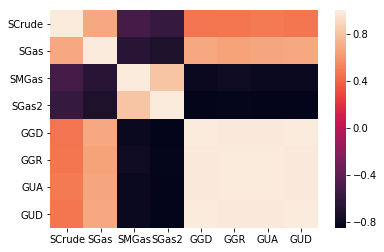

In [23]:
#graphically
sb.heatmap(corr3,xticklabels=Z.corr().columns.values,yticklabels=Z.corr().columns.values)
plt.show()